In [1]:
#importing libraries
import pandas as pd # import pandas library
import numpy as np # import numpy library
import matplotlib.pyplot as plt # import matplotlib library
import seaborn as sns # import seaborn library
import os
import math
import random
import warnings
import numpy as np
#Library for Working with model 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import SpectralClustering
import time
%matplotlib inline


In [2]:
!cp -r /content/drive/MyDrive/FinalDF /content

In [3]:
def plot_clusters(data, label, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('PuRd_r', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.70, 0.70, 0.70) for x in labels]
    fig, [ax1,ax2] = plt.subplots(1,2,figsize=(8,4))
    ax1.axis('on')
    ax2.axis('on')
    ax1.scatter(data[data.columns[0]].T, data[data.columns[1]].T, c=colors)
    ax2.scatter(data[data.columns[0]].T, data[data.columns[1]].T,c =label )
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    ax1.set_title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=8)
    ax2.set_title('data in real labels', fontsize=8)
    # plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [4]:
li = []
all_files=['/content/FinalDF/chroma_stft.csv','/content/FinalDF/rms.csv',
           '/content/FinalDF/zerocrossing.csv','/content/FinalDF/mfcc.csv','/content/FinalDF/labels.csv']
for filename in all_files:
    df = pd.read_csv(filename,index_col=[0])
    df = df.reset_index(drop=True)
    li.append(df)


Dataset = pd.concat(li, axis=1)

In [5]:
li = []
all_files=['/content/FinalDF/magnitude_spectrum.csv','/content/FinalDF/labels.csv']
for filename in all_files:
    df = pd.read_csv(filename,index_col=[0])
    df = df.reset_index(drop=True)
    li.append(df)


Dataset_spectrum = pd.concat(li, axis=1)

In [6]:
Labels = Dataset['Dastgah']
ploting_df=Dataset[['Dastgah','Instrument']]
Dataset = Dataset.drop('Dastgah',axis = 1)

ploting_df['Dastgah'].replace([0, 1,2,3,4,5,6], ['Shour', 'Segah','Mahoor','Homayoun','Rast Panjgah','Nava','Chargah'], inplace=True)
ploting_df['Instrument'].replace([0, 1,2,3,4,5],['Tar','Kamanche','Santoor','Setar','Ney','Combinative'], inplace=True)

ploting_df=Dataset_spectrum[['Dastgah','Instrument']]
Dataset_spectrum = Dataset_spectrum.drop('Dastgah',axis = 1)

ploting_df['Dastgah'].replace([0, 1,2,3,4,5,6], ['Shour', 'Segah','Mahoor','Homayoun','Rast Panjgah','Nava','Chargah'], inplace=True)
ploting_df['Instrument'].replace([0, 1,2,3,4,5],['Tar','Kamanche','Santoor','Setar','Ney','Combinative'], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [7]:
# Normalizing data
x = Dataset.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
Normalized_Dataset = pd.DataFrame(x_scaled)

In [8]:
x = Dataset_spectrum.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
Normalized_Dataset_spectrum = pd.DataFrame(x_scaled)

## K-mean

### K-mean for data with 81 feature

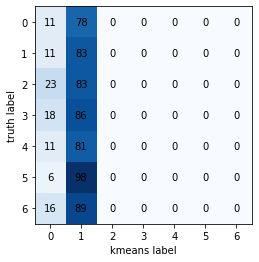

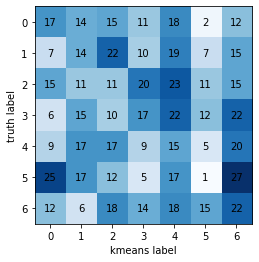

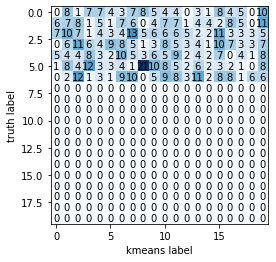

In [9]:
number_of_clusters=[2,7,20]
for nc in number_of_clusters:
  kmeans = KMeans(n_clusters=nc, random_state=0).fit(Normalized_Dataset.values)
  cm = confusion_matrix(Labels.values, kmeans.predict(Normalized_Dataset.values))

  # Plot confusion matrix
  plt.imshow(cm,interpolation='none',cmap='Blues')
  for (i, j), z in np.ndenumerate(cm):
      plt.text(j, i, z, ha='center', va='center')
  plt.xlabel("kmeans label")
  plt.ylabel("truth label")
  plt.show()

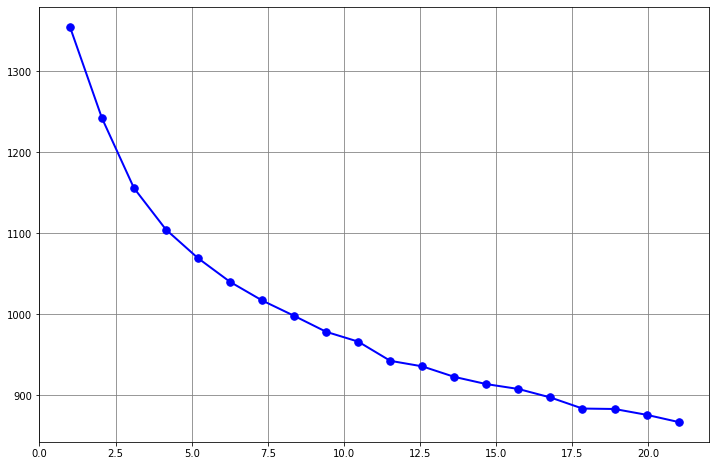

In [10]:
wcss = []
for K in range(1, 21):
    model = KMeans(n_clusters=K)
    model.fit(Normalized_Dataset.values)
    wcss.append(model.inertia_)
plt.subplots(figsize=(12,8))   
plt.plot(np.linspace(1,21,20), wcss,'b.-',linewidth=2,markersize=15)
plt.grid(color='gray')
plt.show()

In [11]:
# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Normalized_Dataset)
principalDf = pd.DataFrame(data = principalComponents , columns = ['pc1','pc2'])


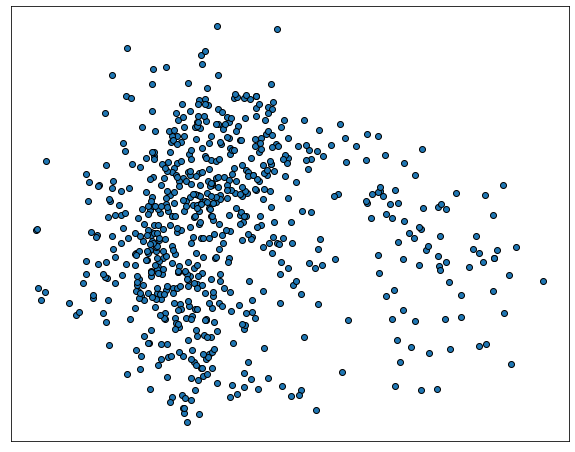

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
ax.axis('on')
plt.scatter(principalDf['pc1'].T, principalDf['pc2'].T,edgecolor = 'k')
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

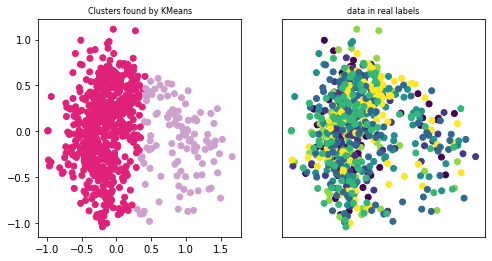

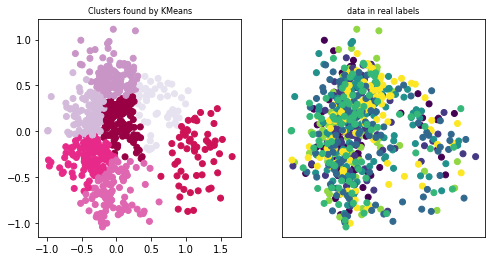

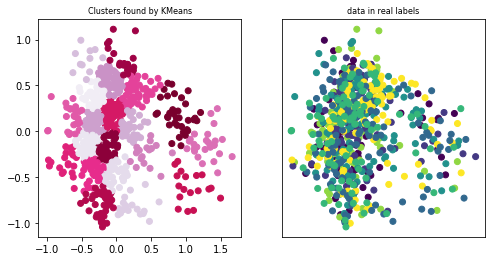

In [13]:
number_of_clusters=[2,7,20]
for nc in number_of_clusters:
  plot_clusters(principalDf,Labels, cluster.KMeans, (), {'n_clusters':nc})

### K-mean for spectrum data

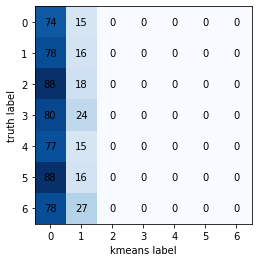

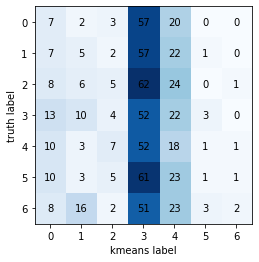

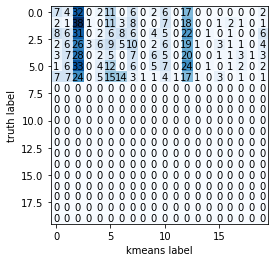

In [14]:
number_of_clusters=[2,7,20]
for nc in number_of_clusters:
  kmeans = KMeans(n_clusters=nc, random_state=0).fit(Normalized_Dataset_spectrum.values)
  cm = confusion_matrix(Labels.values, kmeans.predict(Normalized_Dataset_spectrum.values))

  # Plot confusion matrix
  plt.imshow(cm,interpolation='none',cmap='Blues')
  for (i, j), z in np.ndenumerate(cm):
      plt.text(j, i, z, ha='center', va='center')
  plt.xlabel("kmeans label")
  plt.ylabel("truth label")
  plt.show()

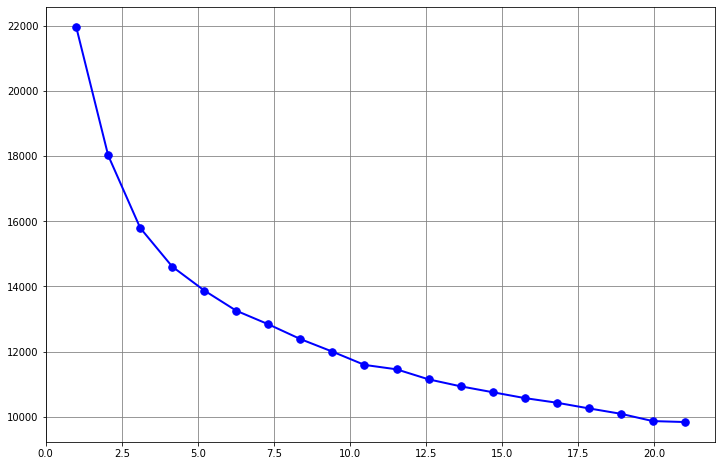

In [15]:
wcss = []
for K in range(1, 21):
    model = KMeans(n_clusters=K)
    model.fit(Normalized_Dataset_spectrum.values)
    wcss.append(model.inertia_)
plt.subplots(figsize=(12,8))   
plt.plot(np.linspace(1,21,20), wcss,'b.-',linewidth=2,markersize=15)
plt.grid(color='gray')
plt.show()

In [16]:
# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Normalized_Dataset_spectrum)
principalDf = pd.DataFrame(data = principalComponents , columns = ['pc1','pc2'])



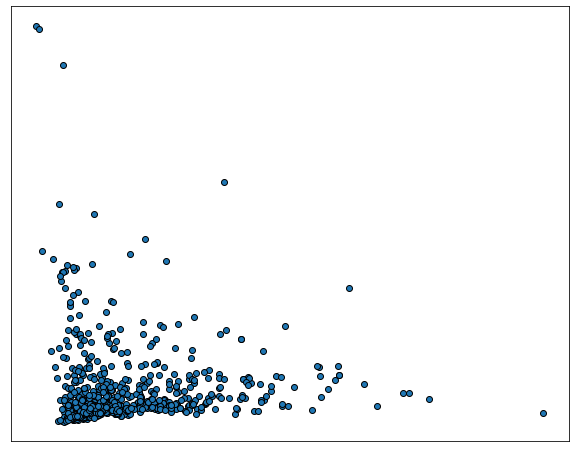

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
ax.axis('on')
plt.scatter(principalDf['pc1'].T, principalDf['pc2'].T,edgecolor = 'k')
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

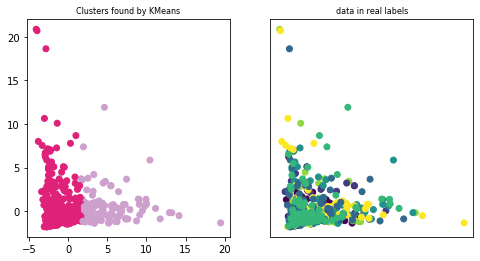

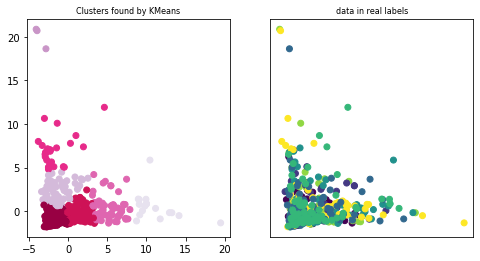

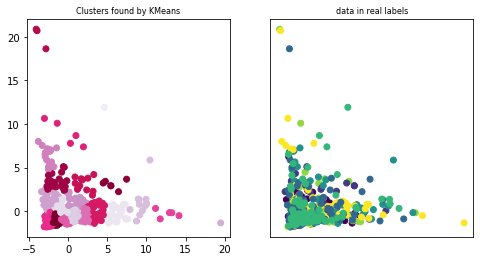

In [18]:
number_of_clusters=[2,7,20]
for nc in number_of_clusters:
  plot_clusters(principalDf,Labels, cluster.KMeans, (), {'n_clusters':nc})

## Spectral Clustering

#### spactral Clustering for dataset with 80 feature

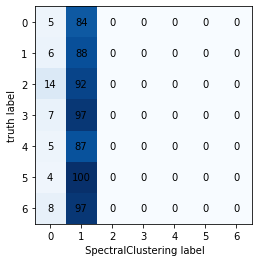

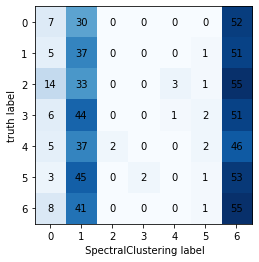

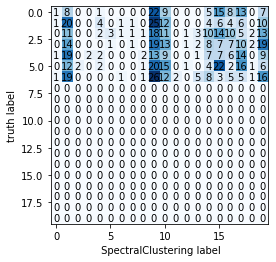

In [19]:
number_of_clusters=[2,7,20]
for nc in number_of_clusters:
  SpectralC = SpectralClustering(n_clusters=nc,random_state=0).fit(Normalized_Dataset.values)
  cm = confusion_matrix(Labels.values, SpectralC.fit_predict(Normalized_Dataset.values))

  # Plot confusion matrix
  plt.imshow(cm,interpolation='none',cmap='Blues')
  for (i, j), z in np.ndenumerate(cm):
      plt.text(j, i, z, ha='center', va='center')
  plt.xlabel(" SpectralClustering label")
  plt.ylabel("truth label")
  plt.show()

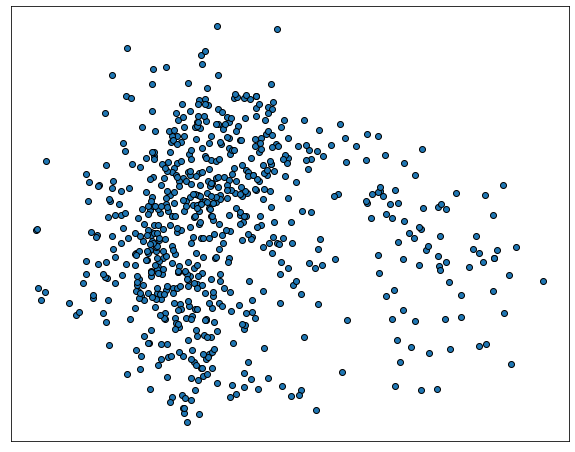

In [20]:
# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Normalized_Dataset)
principalDf = pd.DataFrame(data = principalComponents , columns = ['pc1','pc2'])
fig, ax = plt.subplots(figsize=(10,8))
ax.axis('on')
plt.scatter(principalDf['pc1'].T, principalDf['pc2'].T,edgecolor = 'k')
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

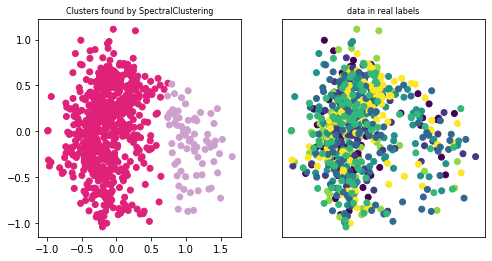

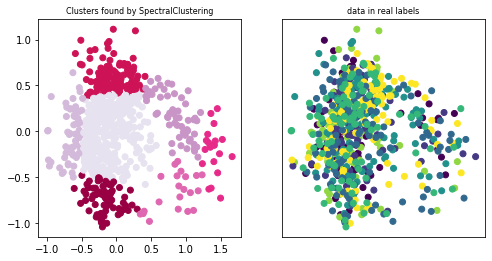

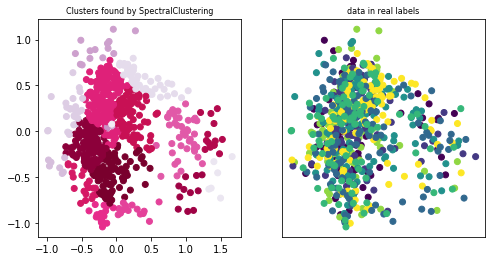

In [21]:
number_of_clusters=[2,7,20]
for nc in number_of_clusters:
  plot_clusters(principalDf,Labels, cluster.SpectralClustering, (), {'n_clusters':nc})

#### spactral Clustering for spectrum dataset 





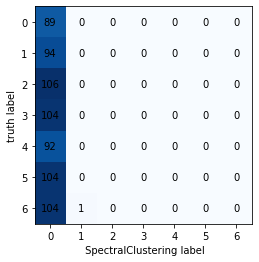

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:366: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  est = KMeans(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:366: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  est = KMeans(


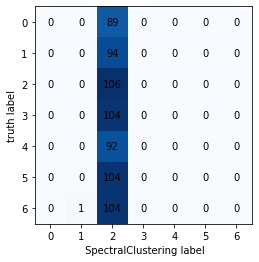

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:366: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  est = KMeans(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:366: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  est = KMeans(


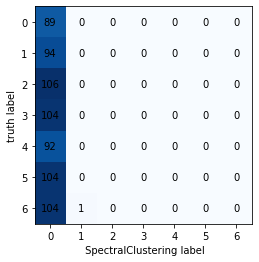

In [22]:
number_of_clusters=[2,7,20]
for nc in number_of_clusters:
  SpectralC = SpectralClustering(n_clusters=nc,random_state=0).fit(Normalized_Dataset_spectrum.values)
  cm = confusion_matrix(Labels.values, SpectralC.fit_predict(Normalized_Dataset_spectrum.values))

  # Plot confusion matrix
  plt.imshow(cm,interpolation='none',cmap='Blues')
  for (i, j), z in np.ndenumerate(cm):
      plt.text(j, i, z, ha='center', va='center')
  plt.xlabel(" SpectralClustering label")
  plt.ylabel("truth label")
  plt.show()

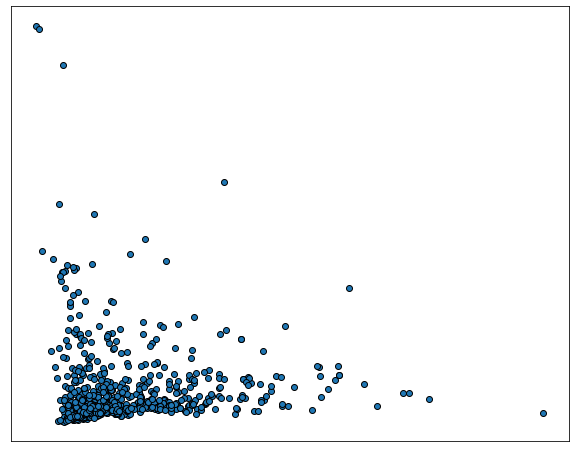

In [23]:
# Top 2 pca components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Normalized_Dataset_spectrum)
principalDf = pd.DataFrame(data = principalComponents , columns = ['pc1','pc2'])
fig, ax = plt.subplots(figsize=(10,8))
ax.axis('on')
plt.scatter(principalDf['pc1'].T, principalDf['pc2'].T,edgecolor = 'k')
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

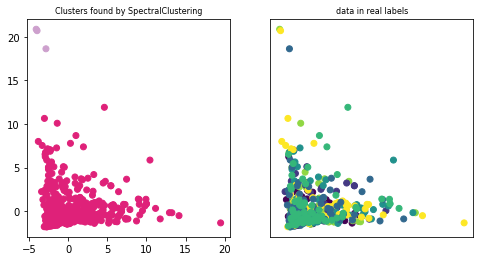

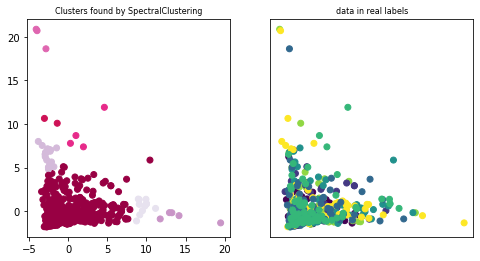

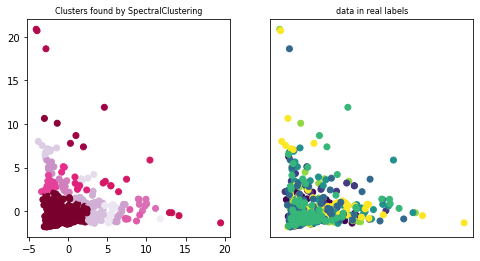

In [24]:
number_of_clusters=[2,7,20]
for nc in number_of_clusters:
  plot_clusters(principalDf,Labels, cluster.SpectralClustering, (), {'n_clusters':nc})